## ECE113 Lab 0 - Basic Python and DTFT <br> <small> April 23, 2021 </small>

### General iPython Notebook usage instructions

- Click the `Play` button to run and advance a cell. The short-cut for it is `shift-enter`
- To add a new cell, either select `"Insert->Insert New Cell Below"` or click the white down arrow button
- You can change the cell mode from code to text in the pulldown menu. I use `Markdown` for text
- You can change the texts in the `Markdown` cells by double-clicking them.
- To save your notebook, either select `"File->Save and Checkpoint"` or hit `Command-s` for Mac and `Ctrl-s` for Windows
- To undo in each cell, hit `Command-z` for Mac and `Ctrl-z` for Windows
- To undo `Delete Cell`, select `Edit->Undo Delete Cell`
- `Help->Keyboard Shortcuts` has a list of keyboard shortcuts

# Nha Do - UID: 405314461

### Basic Python Questions:

To complete this part of the lab, you will need to read and run the python tutorial posted on CCLE.

Double-click the answer cell to add your answer. You can also insert a new cell by selecting `"Insert->Insert New Cell Below"` or clicking the white down arrow

__Q0.__ What do you add after a function to get the help window?

__A0.__ We will add question mark '?' after a function

__Q1.__ What do you have to import to make all division a real division?

__A1.__ We import division from future

__Q2.__ What are the standard abbreviations for `numpy` and `matplotlib.pyplot` ?

__A2.__ np for numpy and plt for matplotlib.pyplot

__Q3.__ What is the output of the following commands?

    x = np.array([1,2,3,4,5,6])
    y = x[0:4]
    y[0] = 7
    print(x)

__A3.__ [7 2 3 4 5 6]

__Q4.__ Write a code that prints `[5 4 3 2 1 0 1 2 3 4]`.

In [2]:
# A4.
import numpy as np
from numpy import r_

print(np.append(np.r_[5:0:-1], np.r_[0:5]))

[5 4 3 2 1 0 1 2 3 4]


__Q5.__ Write a code that prints out an array of every other integer from 0 to 4

In [3]:
# A5.
print(np.r_[0:5])

[0 1 2 3 4]


__Q6.__ Generate the same plot as in the following figure inline:
    



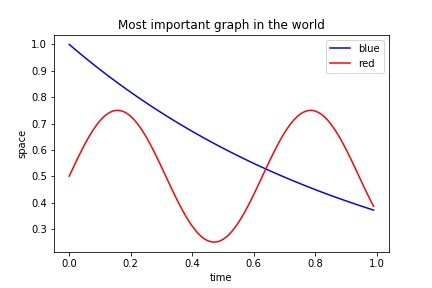

In [4]:
from IPython.display import Image
Image('tutorial_plot.jpg')

(0.2, 1.0)

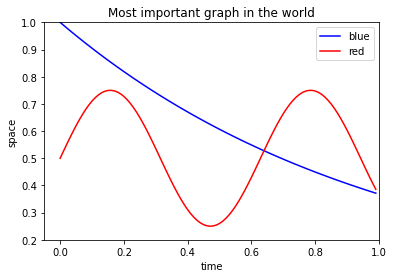

In [5]:
# A6.
import matplotlib.pyplot as plt

x = np.r_[:1:0.01]
y1 = np.exp( -x )
y2 = np.sin( x*10.0 )/4.0 + 0.5

plt.figure()
plt.plot(x,y1,color='blue')
plt.plot(x,y2,color='red')
plt.xlabel( "time" )
plt.ylabel( "space" )
plt.title( "Most important graph in the world" )
plt.legend( ("blue", "red") )

plt.xlim([-0.05,1])
plt.ylim([0.2,1])

### DTFT:

In this part of the lab, we will look at the DTFT of rectangular windows and triangular windows and compare their performances as low-pass filters. There is a code template provided for each part to help you become familiar with numpy syntax.

### Part (a):

In [6]:
#Import libraries
import numpy as np
import matplotlib.pyplot as plt
from __future__ import division
%matplotlib inline

Plot the DTFT (at least 512 points) of the rectangular window:

<center>$$ w[n] = \left \{ \begin{array}{cc} 1 & -N \leq n \leq N \\ 0 & \mathrm{otherwise} \end{array} \right. $$ </center>
				
for $ N=5,~20,~100$. Scale the DTFT so that $W(e^{j0})=1$ in your plots. Label your plots! 

Describe the effect of increasing $N$ on the DTFT.

A code template is provided for each part

### Solution for (a):

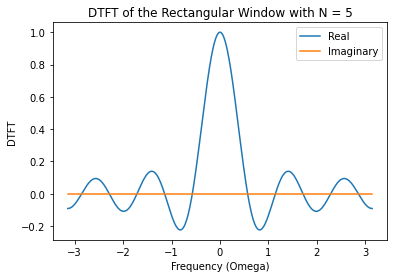

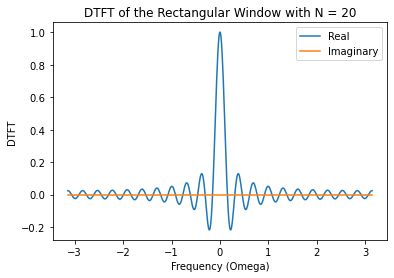

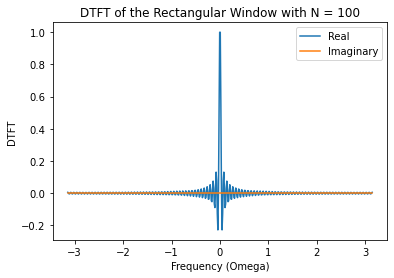

In [36]:
    #repeat for N = 5, 20, 100
    for N in [5, 20, 100]:  
    
        # create 2N+1-point temporal indices (NN) from -N to N using np.r_
        NN = np.r_[-N:N+1:1]
        
        # create window function (w) using np.ones
        w = np.ones((2*N+1))
        
        # create 512-point frequency indices (Omega) from -pi to pi (use np.pi)
        Omega = np.linspace(-np.pi, np.pi, 512)
        
        # create matrix of appropriate temporal indices (n) and frequency indices (omega) using np.meshgrid
        n, omega = np.meshgrid(NN,Omega)
        
        # create DTFT matrix 
        DTFT = np.exp( -1j * n * omega )
        
        # evaluate DTFT
        W = DTFT.dot(w)
         
        # normalize W such that W at omega=0 is 1
        W = W/np.max(W)
        
        # create plots
        # plot both real and imag on the same figure ( use W.real and W.imag )
        plt.figure()
        plt.plot(Omega,W.real)
        plt.plot(Omega,W.imag)
        
        # label plots and put title and legends ( use plt.xlabel, plt.title, plt.legend )
        plt.xlabel("Frequency (Omega)")
        plt.ylabel("DTFT")
        plt.title("DTFT of the Rectangular Window with N = " + str(N))
        plt.legend(('Real','Imaginary'))

Describe the effect of increasing $N$ on the DTFT:

When N is increased, the main lobe becomes narrower, which means the bettre frequency resolution

----

### Part (b):

Repeat part (a) for the triangular window:
$$w_\triangle [n] =  \left ( 1- \frac{|n|}{N} \right ) w[n].$$

### Solution for (b):

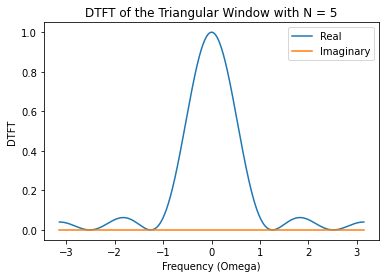

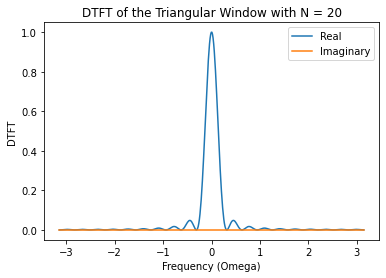

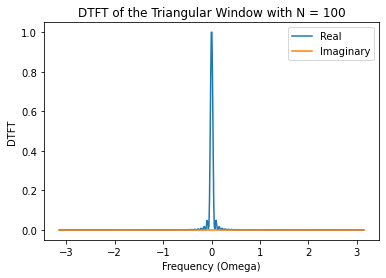

In [33]:
    #repeat for N = 5, 20, 100
    for N in [5, 20, 100]:  
    
        # create 2N+1-point temporal indices (NN) from -N to N using np.r_
        NN = np.r_[-N:N+1:1]
        
        # create window function (w) 
        w = (1 - (abs(NN)/N))
        
        # create 512-point frequency indices (Omega) from -pi to pi (use np.pi)
        Omega = np.linspace(-np.pi, np.pi, 512)
        
        # create matrix of appropriate temporal indices (n) and frequency indices (omega) using np.meshgrid
        n, omega = np.meshgrid(NN, Omega)
        
        # create DTFT matrix 
        DTFT = np.exp( -1j * n * omega )
        
        # evaluate DTFT
        W = DTFT.dot(w)
         
        # normalize W such that W at omega=0 is 1
        W = W/np.max(W)
        
        # create plots
        # plot both real and imag on the same figure ( use W.real and W.imag )
        plt.figure()
        plt.plot(Omega,W.real)
        plt.plot(Omega,W.imag)
        
        # label plots and put title and legends ( use plt.xlabel, plt.title, plt.legend )
        plt.xlabel("Frequency (Omega)")
        plt.ylabel("DTFT")
        plt.title("DTFT of the Triangular Window with N = " + str(N))
        plt.legend(('Real','Imaginary'))

Describe the effect of increasing $N$ on the DTFT:

Again, when N is increased, the main lobe becomes narrower, which means the bettre frequency resolution.

----

### Part (c):

Consider the ideal low-pass filter with cut-off frequency $\omega_c = 0.3 \pi$. Truncate the impulse response of this filter using the windows in parts (a) and (b), and plot the frequency response of the resulting filters. Explain the differences.


### Solution for (c):

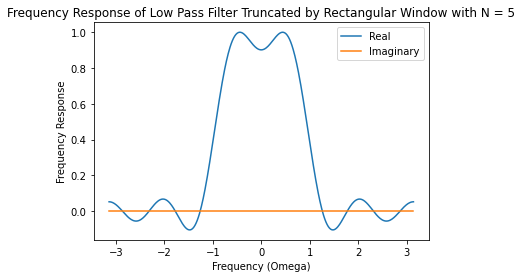

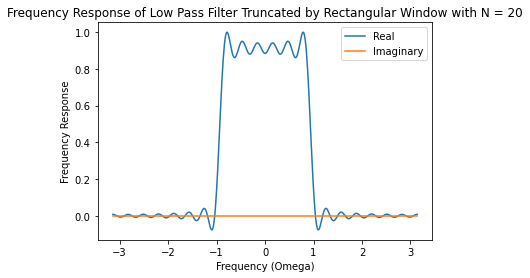

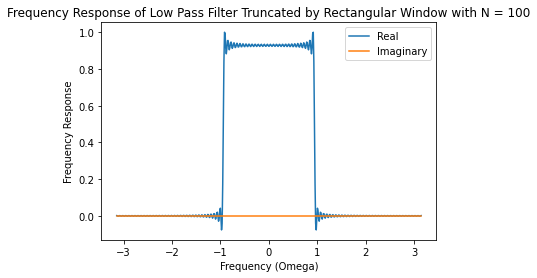

In [34]:
    #repeat for N = 5, 20, 100
    for N in [5, 20, 100]:  
    
        # create 2N+1-point temporal indices (NN) from -N to N using np.r_
        NN = np.r_[-N:N+1:1]
        
        # create window function (w)
        w = 0.3*np.sinc(0.3*NN)*(np.ones((2*N+1)))
        
        # create 512-point frequency indices (Omega) from -pi to pi (use np.pi)
        Omega = np.linspace(-np.pi,np.pi,512)
        
        # create matrix of appropriate temporal indices (n) and frequency indices (omega) using np.meshgrid
        n,omega = np.meshgrid(NN,Omega)
        
        # create DTFT matrix 
        DTFT = np.exp( -1j * n * omega )
        
        # evaluate DTFT
        W = DTFT.dot(w)
         
        # normalize W such that W at omega=0 is 1
        W = W/np.max(W)
        
        # create plots
        # plot both real and imag on the same figure ( use W.real and W.imag )
        plt.figure()
        plt.plot(Omega,W.real)
        plt.plot(Omega,W.imag)
        
        # label plots and put title and legends ( use plt.xlabel, plt.title, plt.legend )
        plt.xlabel("Frequency (Omega)")
        plt.ylabel("Frequency Response")
        plt.title("Frequency Response of Low Pass Filter Truncated by Rectangular Window with N = " + str(N))
        plt.legend(('Real','Imaginary'))

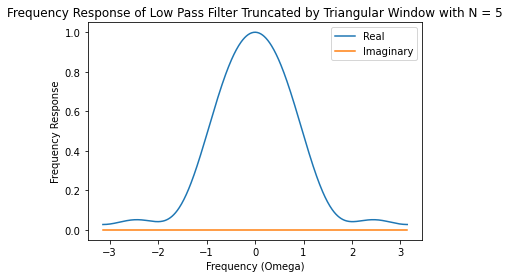

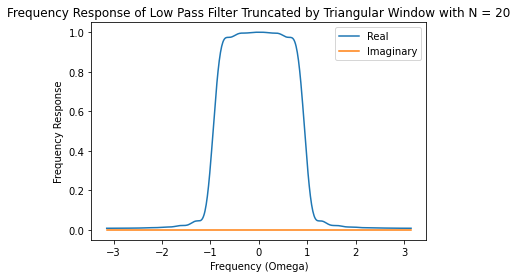

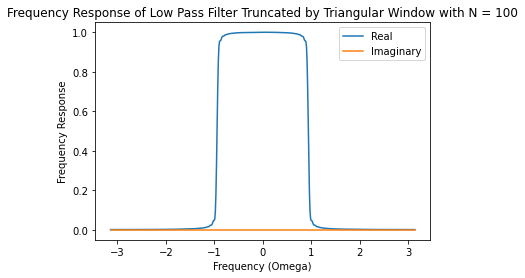

In [35]:
    #repeat for N = 5, 20, 100
    for N in [5, 20, 100]:  
    
        # create 2N+1-point temporal indices (NN) from -N to N using np.r_
        NN = np.r_[-N:N+1:1]
        
        # create window function (w)
        w = 0.3*np.sinc(0.3*NN)*(1 - (abs(NN)/N))
        
        # create 512-point frequency indices (Omega) from -pi to pi (use np.pi)
        Omega = np.linspace(-np.pi,np.pi,512)
        
        # create matrix of appropriate temporal indices (n) and frequency indices (omega) using np.meshgrid
        n, omega = np.meshgrid(NN, Omega)
        
        # create DTFT matrix 
        DTFT = np.exp( -1j * n * omega )
        
        # evaluate DTFT
        W = DTFT.dot(w)
         
        # normalize W such that W at omega=0 is 1
        W = W/np.max(W)
        
        # create plots
        # plot both real and imag on the same figure ( use W.real and W.imag )
        plt.figure()
        plt.plot(Omega,W.real)
        plt.plot(Omega,W.imag)
        
        # label plots and put title and legends ( use plt.xlabel, plt.title, plt.legend )
        plt.xlabel("Frequency (Omega)")
        plt.ylabel("Frequency Response")
        plt.title("Frequency Response of Low Pass Filter Truncated by Triangular Window with N = " + str(N))
        plt.legend(('Real','Imaginary'))

Explain the difference:

1) In both cases, as the number of sample increases, the truncated impulse responses will come closer to ideal low pass filter.

2) The low pass filter truncated by rectangular window has more ripples and not as smooth as using triangular window since the retangular window is the simplest techniques.

3) The rectangular window has more side lobes than triangular, which makes the filter truncated by rectangular window less ideal than triangular window even though the number of sample in both cases is large.

____